In [2]:
import scipy.io
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

In [12]:
# POfacets 결과 mat 파일의 크기 비교

mat_file_path_1 = 'C:/Users/leeyj/lab_ws/pofacets4.5/UH60MResults.mat'
mat_file_path_2 = 'C:/Users/leeyj/lab_ws/pofacets4.5/MResults_2GHz_360.mat'

def extract_sth_from_mat(file_path):

    mat_data = scipy.io.loadmat(file_path)

    sth = mat_data.get('Sth', None)
    
    return sth

sth_1 = extract_sth_from_mat(mat_file_path_1)
sth_2 = extract_sth_from_mat(mat_file_path_2)

diff=sth_1-sth_2
diff=np.sum(np.abs(diff))
diff

0.0

In [34]:
# mat파일에서 RCS값 추출

mat_file_path = 'C:/Users/leeyj/OneDrive - 인하대학교/School/Matlab_Files/RADAR/data/rcs_table/MResults2.mat'

def extract_sth_from_mat(file_path):

    mat_data = scipy.io.loadmat(file_path)

    sth = mat_data.get('Sth', None)

    sth_transposed = np.transpose(sth)
    
    return sth_transposed

sth_transposed = extract_sth_from_mat(mat_file_path)

sth_df = pd.DataFrame(sth_transposed)

csv_file_path = 'C:/Users/leeyj/Downloads/Tomahawk RCS Table/Comparison/Matlab_Tomahawk_RCS.csv'
sth_df.to_csv(csv_file_path, index=False,float_format='%.15f')

ValueError: Must pass 2-d input. shape=()

In [35]:
# mat파일에서 RCS값 추출

mat_file_path = 'C:/Users/leeyj/OneDrive - 인하대학교/School/Matlab_Files/RADAR/data/rcs_table/MResults2.mat'


mat_data = scipy.io.loadmat(mat_file_path)

MResults2 = mat_data['MResults2']
sth = MResults2['Sth']
sth = sth[0,0]

sth_transposed = np.transpose(sth)
sth_df = pd.DataFrame(sth_transposed)

csv_file_path = 'C:/Users/leeyj/Downloads/Tomahawk RCS Table/Comparison/Matlab_Tomahawk_RCS.csv'
sth_df.to_csv(csv_file_path, index=False,float_format='%.15f')

In [20]:
sth_transposed

array([[15.20806858, 15.20806858, 15.20806858, ..., 15.20806858,
        15.20806858, 15.20806858],
       [14.34180321, 14.34241165, 14.34346144, ..., 14.3447308 ,
        14.34372771, 14.34233796],
       [12.33082861, 12.3326892 , 12.33616706, ..., 12.34060165,
        12.33589652, 12.33246988],
       ...,
       [ 4.28580836,  4.28901748,  4.2962389 , ...,  4.30846007,
         4.29690815,  4.28935248],
       [ 8.54986535,  8.55048106,  8.55208295, ...,  8.55472767,
         8.55223312,  8.55055682],
       [10.53439177, 10.53439177, 10.53439177, ..., 10.53439177,
        10.53439177, 10.53439177]])

In [18]:
# # mat파일에서 RCS값 추출
# # 추출 후 일렬로 펼침

# # Path to the MAT file
# mat_file_path = 'C:/Users/leeyj/OneDrive - 인하대학교/School/Matlab_Files/RADAR/data/rcs_table/MResults.mat'
# # mat파일 RCS 데이터를 펼친 결과 csv파일 경로 
# flattened_rcs_file_path = 'C:/Users/leeyj/Downloads/Tomahawk RCS Table/Comparison/Matlab_Tomahawk_RCSonly.csv'

# def extract_sth_from_mat(file_path):
#     # Load the MATLAB file
#     mat_data = scipy.io.loadmat(file_path)
    
#     # Extract the 'Sth' variable
#     sth = mat_data.get('Sth', None)

#     sth_transposed = np.transpose(sth)
    
#     return sth_transposed

# # Extract the Sth variable
# sth_transposed = extract_sth_from_mat(mat_file_path)

# # Convert the transposed Sth data to a DataFrame
# sth_df = pd.DataFrame(sth_transposed)
# flattened_sth_df = sth_df.values.flatten()
# flattened_rcs_df = pd.DataFrame(flattened_sth_df, columns=["RCS [dBsm]"])
# flattened_rcs_df.to_csv(flattened_rcs_file_path, index=False,float_format='%.15f')

In [17]:
# len(flattened_sth_df)

65341

In [24]:
# dat파일의 경우를 추출 후 일렬로 펼침

# Let's read the provided data file to understand its structure.
file_path = 'C:/Users/leeyj/Downloads/Tomahawk RCS Table/Comparison/Tomahawk_PO_3D_1_300MHz_FFE.csv'

with open(file_path, 'r') as file:
    data = file.readlines()

# Read the data into a pandas DataFrame
column_names = ["Plane Wave Theta [deg]", "Plane Wave Phi [deg]", "FarField1 [dBsm]"]
data = pd.read_csv(file_path, delimiter='\t', skiprows=1, names=column_names)

# Skip the first two rows and read the data again
data = pd.read_csv(file_path, delimiter='\t', skiprows=2, names=column_names)

# Convert scientific notation to float
data["Plane Wave Theta [deg]"] = data["Plane Wave Theta [deg]"].astype(float)
data["Plane Wave Phi [deg]"] = data["Plane Wave Phi [deg]"].astype(float)
data["FarField1 [dBsm]"] = data["FarField1 [dBsm]"].astype(float)

# pd.set_option('display.float_format', lambda x: '%.15f' % x)

# Extract the "FarField1 [dBsm]" column
rcs_values = data["FarField1 [dBsm]"]

# Create a new DataFrame with only this column
rcs_df = pd.DataFrame(rcs_values)

# Save this DataFrame to a new CSV file
output_file_path = 'C:/Users/leeyj/Downloads/Tomahawk RCS Table/Comparison/Tonahawk_1_300MHz_0-180.csv'
rcs_df.to_csv(output_file_path, index=False, float_format='%.15f')

output_file_path

'C:/Users/leeyj/Downloads/Tomahawk RCS Table/Comparison/Tonahawk_1_300MHz_0-180.csv'

In [10]:
# ffe를 통해 얻은 csv 파일의 경우를 추출 후 일렬로 펼침

file_path = 'C:/Users/leeyj/Downloads/Tomahawk RCS Table/Comparison/Tomahawk_PO_3D_1_300MHz_FFE.csv'
output_file_path = 'C:/Users/leeyj/Downloads/Tomahawk RCS Table/Comparison/Tomahawk_PO_3D_1_300MHz_FFE_RCS.csv'

with open(file_path, 'r') as file:
    data = file.readlines()

column_names = ["Elevation Angle (degrees)", "Azimuth Angle (degrees)", "RCS (dBsm)"]
data = pd.read_csv(file_path, delimiter=',', skiprows=1, names=column_names)
data["Elevation Angle (degrees)"] = data["Elevation Angle (degrees)"].astype(float)
data["Azimuth Angle (degrees)"] = data["Azimuth Angle (degrees)"].astype(float)
data["RCS (dBsm)"] = data["RCS (dBsm)"].astype(float)
rcs_values = data["RCS (dBsm)"]
rcs_df = pd.DataFrame(rcs_values)
rcs_df.to_csv(output_file_path, index=False, float_format='%.15f')

'C:/Users/leeyj/Downloads/Tomahawk RCS Table/Comparison/Tomahawk_PO_3D_1_300MHz_FFE_RCS.csv'

In [26]:
# 결과로 구한 두 csv파일의 MSE를 구함

# Load the two CSV files
dat_rcs_values = pd.read_csv('C:/Users/leeyj/Downloads/Tomahawk RCS Table/Comparison/Tomahawk_PO_3D_1_300MHz_FFE_RCS.csv')
mat_rcs_values = pd.read_csv('C:/Users/leeyj/Downloads/Tomahawk RCS Table/Comparison/Matlab_Tomahawk_RCS.csv')

# Extract the RCS values as numpy arrays
dat_rcs_values = dat_rcs_values.values
mat_rcs_values = mat_rcs_values.values

# Calculate the absolute differences
absolute_differences = abs(dat_rcs_values - mat_rcs_values)

# Calculate the mean absolute error
mean_absolute_error = absolute_differences.mean()

print(f"Mean Absolute Error: {mean_absolute_error}")

Mean Absolute Error: 1.7592061196392854


In [5]:
# 일렬로 펼쳐진 데이터를 행렬 형식으로 변환
# dat파일에서 csv로 변환하는 경우

file_path = 'C:/Users/ThinkYun/OneDrive - 인하대학교/School/Matlab_Files/RADAR/data/rcs_table/Tonahawk_1_300MHz_0-180.dat'

with open(file_path, 'r') as file:
    content = file.readlines()

# Read the data into a DataFrame
data = pd.read_csv(file_path, sep='\t', skiprows=2, header=None)
data.columns = ["Plane Wave Theta [deg]", "Plane Wave Phi [deg]", "FarField1 [dBsm]"]

# Pivot the data to have rows as "Plane Wave Theta [deg]" and columns as "Plane Wave Phi [deg]"
pivot_data = data.pivot(index="Plane Wave Theta [deg]", columns="Plane Wave Phi [deg]", values="FarField1 [dBsm]")

# Save the pivoted data to a CSV file
output_file_path = 'C:/Users/ThinkYun/OneDrive - 인하대학교/School/Matlab_Files/RADAR/data/pivot.csv'

pivot_data.to_csv(output_file_path, header=False, index=False,float_format='%.15f')

# Displaying the first few rows of the pivoted data to confirm the structure
pivot_data.head()

Plane Wave Phi [deg],0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,351.0,352.0,353.0,354.0,355.0,356.0,357.0,358.0,359.0,360.0
Plane Wave Theta [deg],,,,,,,,,,,,,,,,,,,,,
0.0,15.412625,15.412018,15.411281,15.410413,15.409417,15.408292,15.407042,15.405665,15.404166,15.402544,...,15.412135,15.412719,15.413170,15.413490,15.413678,15.413732,15.413654,15.413443,15.413100,15.412625
1.0,14.668344,14.663306,14.658561,14.654120,14.649996,14.646198,14.642737,14.639624,14.636869,14.635037,...,14.718930,14.712117,14.705870,14.699825,14.693993,14.688383,14.683003,14.677864,14.672975,14.668344
2.0,12.794514,12.783600,12.774158,12.766214,12.757012,12.752484,12.749532,12.748174,12.748425,12.751120,...,12.942718,12.920647,12.900356,12.881298,12.863504,12.847007,12.831818,12.817994,12.805551,12.794514
3.0,9.590375,9.570647,9.554544,9.542128,9.533478,9.528577,9.527514,9.530325,9.536523,9.548259,...,9.851673,9.855042,9.811083,9.769716,9.731515,9.696554,9.664864,9.636574,9.611725,9.590375
4.0,5.213736,5.180188,5.151507,5.127798,5.109213,5.095265,5.087158,5.084590,5.088262,5.099126,...,5.625625,5.561538,5.503420,5.498484,5.439343,5.385307,5.335362,5.290117,5.249563,5.213736


In [9]:
# 일렬로 펼쳐진 데이터를 행렬 형식으로 변환
# ffe 파일에서 csv로 변환하는 경우

file_path = 'C:/Users/leeyj/lab_ws/data/radar/Tomahawk/Tomahawk_PO_3D_1_300MHz_FFE.csv'

with open(file_path, 'r') as file:
    content = file.readlines()

# Read the data into a DataFrame
data = pd.read_csv(file_path, sep=',', skiprows=1, header=None)
data.columns = ["Elevation Angle (degrees)", "Azimuth Angle (degrees)", "RCS (dBsm)"]

# Pivot the data to have rows as "Plane Wave Theta [deg]" and columns as "Plane Wave Phi [deg]"
pivot_data = data.pivot(index="Elevation Angle (degrees)", columns="Azimuth Angle (degrees)", values="RCS (dBsm)")

# Save the pivoted data to a CSV file
output_file_path = 'C:/Users/leeyj/lab_ws/data/radar/Tomahawk/Tomahawk_PO_3D_1_300MHz_FFE_Mat.csv'

pivot_data.to_csv(output_file_path, header=False, index=False,float_format='%.15f')

# Displaying the first few rows of the pivoted data to confirm the structure
pivot_data.head()

Azimuth Angle (degrees),0,1,2,3,4,5,6,7,8,9,...,351,352,353,354,355,356,357,358,359,360
Elevation Angle (degrees),,,,,,,,,,,,,,,,,,,,,
0.0,15.420636,15.419180,15.417596,15.415886,15.414052,15.412095,15.410019,15.407825,15.405516,15.403094,...,15.403094,15.405516,15.407825,15.410019,15.412095,15.414052,15.415886,15.417596,15.419180,15.420636
1.0,14.688908,14.687552,14.686446,14.685593,14.684996,14.684657,14.684579,14.684763,14.685211,14.686480,...,14.686480,14.685211,14.684763,14.684579,14.684657,14.684996,14.685593,14.686446,14.687552,14.688908
2.0,12.743018,12.741450,12.741361,12.742757,12.745644,12.749400,12.755488,12.762796,12.771467,12.782516,...,12.782516,12.771467,12.762796,12.755488,12.749400,12.745644,12.742757,12.741361,12.741450,12.743018
3.0,9.349539,9.347849,9.349133,9.355065,9.365587,9.379349,9.397117,9.418725,9.443659,9.473970,...,9.473970,9.443659,9.418725,9.397117,9.379349,9.365587,9.355065,9.349133,9.347849,9.349539
4.0,4.549533,4.546281,4.549381,4.558059,4.573509,4.593408,4.619561,4.651591,4.690113,4.736153,...,4.736153,4.690113,4.651591,4.619561,4.593408,4.573509,4.558059,4.549381,4.546281,4.549533


In [34]:
# sum(absolute_differences)/65341

array([6.58833151])

In [ ]:
# # Calculate the squared differences
# squared_differences = (dat_rcs_values - mat_rcs_values) ** 2

# # Calculate the mean squared error
# mean_squared_error = squared_differences.mean()

# print(f"Mean Squared Error: {mean_squared_error}")

In [36]:
# 결과로 구한 두 csv파일의 오차로 이루어진 동일 구조(행렬 형식)의 csv파일을 생성

dat_rcs_values = pd.read_csv('C:/Users/leeyj/OneDrive - 인하대학교/School/Matlab_Files/RADAR/data/rcs_table/Tomahawk_PO_3D_1_300MHz_FFE_mat.csv',header=None)
mat_rcs_values = pd.read_csv('C:/Users/leeyj/OneDrive - 인하대학교/School/Matlab_Files/RADAR/data/rcs_table/Matlab_Tomahawk_RCS.csv',header=None)
diff_csv = "C:/Users/leeyj/OneDrive - 인하대학교/School/Matlab_Files/RADAR/data/rcs_table/diff_csv.csv"

absolute_differences = abs(dat_rcs_values - mat_rcs_values)
absolute_differences.to_csv(diff_csv,header=False, index=False,float_format='%.15f')

In [1]:
# 극 좌표계로 시각화

rcs_data = []
feko_rcs = 'C:/Users/leeyj/lab_ws/data/radar/737/90deg.txt'
# matlab_rcs = 'C:/Users/leeyj/Downloads/Tomahawk RCS Table/Comparison/Matlab_Tomahawk_90deg.txt'
with open(feko_rcs, 'r') as f:
    for line in f:
        rcs_data.append(float(line.strip()))
angles = np.linspace(0, 360, len(rcs_data))
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(np.radians(angles), rcs_data)
ax.set_title('RCS Polar Plot')
ax.set_theta_zero_location('N')
# ax.set_theta_direction(-1)
plt.show()

ValueError: could not convert string to float: '90.0,0,52.860938576710794'

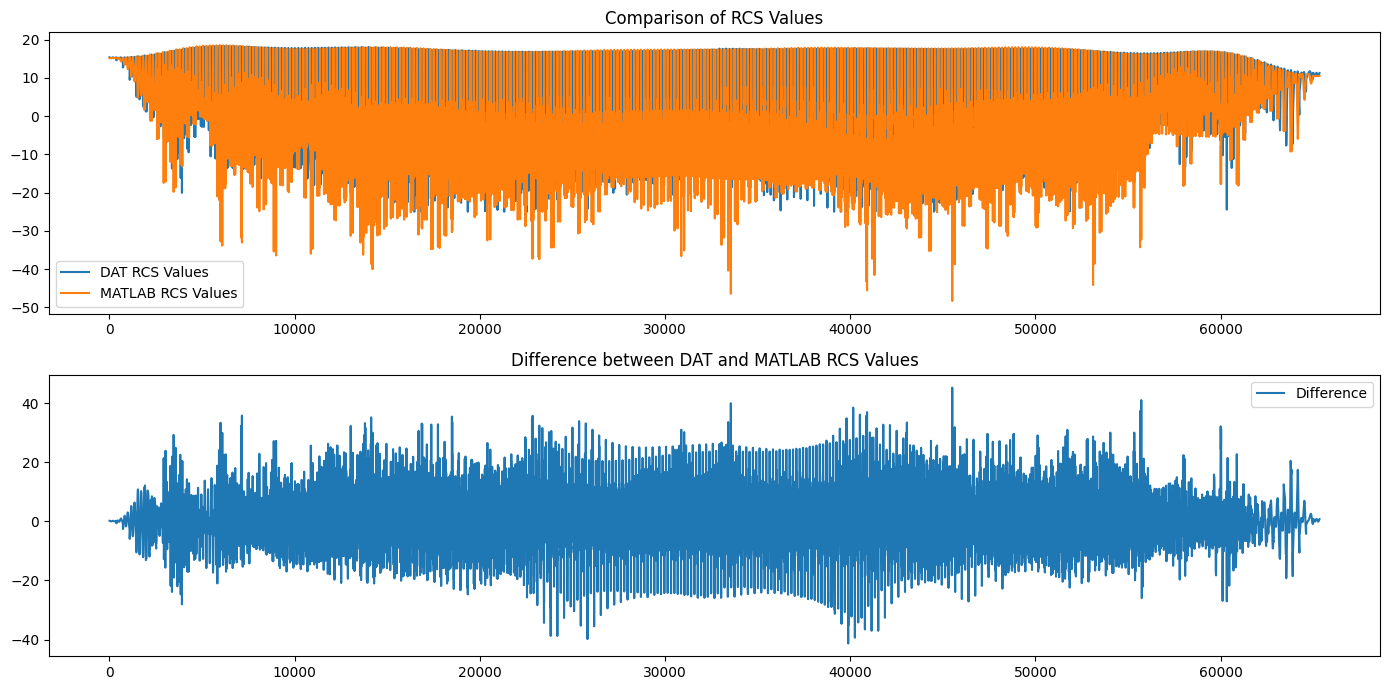

In [30]:
import matplotlib.pyplot as plt

# Plot the two data sets
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(dat_rcs_values, label='DAT RCS Values')
plt.plot(mat_rcs_values, label='MATLAB RCS Values')
plt.legend()
plt.title('Comparison of RCS Values')

plt.subplot(2, 1, 2)
plt.plot(dat_rcs_values - mat_rcs_values, label='Difference')
plt.legend()
plt.title('Difference between DAT and MATLAB RCS Values')

plt.tight_layout()
plt.show()